In [1]:
!git clone https://github.com/microsoft/OmniParser.git

Cloning into 'OmniParser'...
remote: Enumerating objects: 243, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 243 (delta 61), reused 58 (delta 48), pack-reused 162 (from 1)
Receiving objects: 100% (243/243), 31.76 MiB | 34.94 MiB/s, done.
Resolving deltas: 100% (96/96), done.


In [2]:
!cd OmniParser && pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.8/220.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.5/719.5 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.6/187.6 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 17.8 MB/s eta 0:00:00

In [9]:
!bash OmniParser/download.sh

--2024-11-02 10:39:47--  https://huggingface.co/microsoft/OmniParser/resolve/main/icon_detect/model.safetensors
Resolving huggingface.co (huggingface.co)... 18.238.176.103, 18.238.176.129, 18.238.176.8, ...
Connecting to huggingface.co (huggingface.co)|18.238.176.103|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/9c/88/9c88bb669bca53fb47f271fa33832931cff0905ce244f5eb16864f80249be723/84caa6c7e0607d7d6edddb46f2affd0d0d86ddf34e71fbcce7b4ba461bd97574?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1730803187&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczMDgwMzE4N319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zLzljLzg4LzljODhiYjY2OWJjYTUzZmI0N2YyNzFmYTMzODMyOTMxY2ZmMDkwNWNlMjQ0ZjVlYjE2ODY0ZjgwMjQ5YmU3MjMvODRjYWE2YzdlMDYwN2Q3ZDZlZGRkYjQ2ZjJhZmZkMGQwZDg2ZGRmMzRlNzFmYmNjZTdiNGJhNDYxYmQ5NzU3N

In [19]:
!pip install torch=='2.4.1+cu121' torchvision=='0.19.1+cu121' torchaudio=='2.4.1+cu121' --index-url https://download.pytorch.org/whl/cu121

  Using cached flash_attn-2.6.3.tar.gz (2.6 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for flash_attn: filename=flash_attn-2.6.3-cp310-cp310-linux_x86_64.whl size=187309225 sha256=237ef9c6157db394e1ddde4ba609a21ebb98382377a27041edc09318801a6f24
  Stored in directory: /root/.cache/pip/wheels/7e/e3/c3/89c7a2f3c4adc07cd1c675f8bb7b9ad4d18f64a72bccdfe826
Successfully built flash_attn


In [ ]:
!pip install flash_attn

In [25]:
import sys
sys.path.append('/content/OmniParser')  # Adds current directory to Python path

In [28]:
from utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model
import torch
from ultralytics import YOLO
from PIL import Image
import base64
import matplotlib.pyplot as plt
import io

In [29]:
def initialize_models(device='cuda'):
    """Initialize the YOLO and caption models."""
    # Initialize YOLO model
    som_model = get_yolo_model(model_path='weights/icon_detect/best.pt')
    som_model.to(device)
    print('model to {}'.format(device))

    # Initialize caption model (choose one of the two options)
    # Option 1: BLIP2
    # caption_model_processor = get_caption_model_processor(
    #     model_name="blip2",
    #     model_name_or_path="weights/icon_caption_blip2",
    #     device=device
    # )

    # Option 2: Florence2
    caption_model_processor = get_caption_model_processor(
        model_name="florence2",
        model_name_or_path="weights/icon_caption_florence",
        device=device
    )

    return som_model, caption_model_processor

In [30]:
def process_image(image_path, som_model, caption_model_processor, box_threshold=0.03):
    """Process an image and return labeled results."""
    # Configuration for drawing bounding boxes
    draw_bbox_config = {
        'text_scale': 0.8,
        'text_thickness': 2,
        'text_padding': 3,
        'thickness': 3,
    }

    # Open and convert image
    image = Image.open(image_path)
    image_rgb = image.convert('RGB')

    # Perform OCR
    ocr_bbox_rslt, is_goal_filtered = check_ocr_box(
        image_path,
        display_img=False,
        output_bb_format='xyxy',
        goal_filtering=None,
        easyocr_args={'paragraph': False, 'text_threshold': 0.9},
        use_paddleocr=True
    )
    text, ocr_bbox = ocr_bbox_rslt

    # Get labeled image and results
    dino_labled_img, label_coordinates, parsed_content_list = get_som_labeled_img(
        image_path,
        som_model,
        BOX_TRESHOLD=box_threshold,
        output_coord_in_ratio=False,
        ocr_bbox=ocr_bbox,
        draw_bbox_config=draw_bbox_config,
        caption_model_processor=caption_model_processor,
        ocr_text=text,
        use_local_semantics=True,
        iou_threshold=0.1
    )

    return dino_labled_img, label_coordinates, parsed_content_list


model to cuda

image 1/1 /content/OmniParser/imgs/windows_multitab.png: 448x640 215 0s, 8.4ms
Speed: 2.9ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


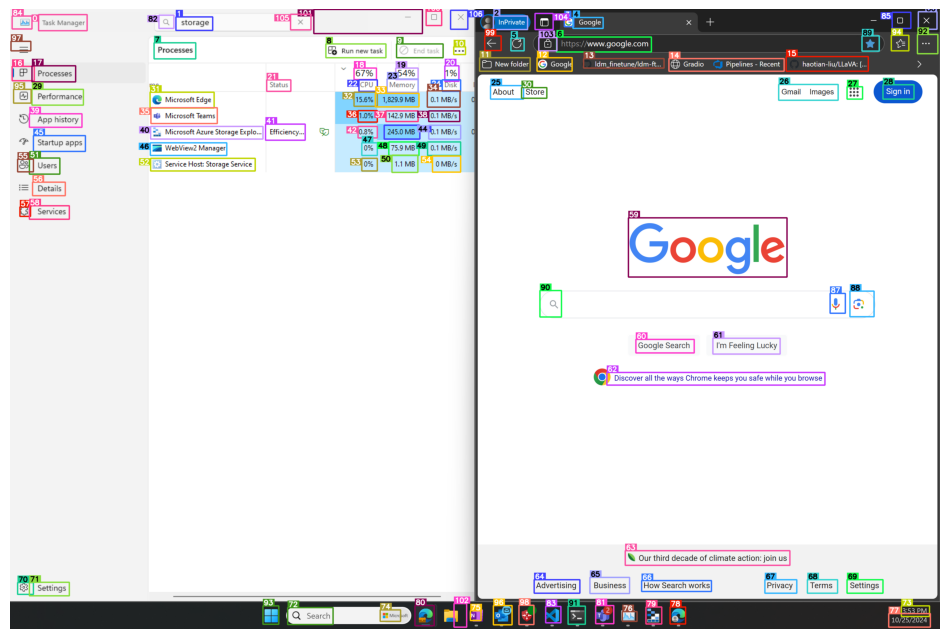

Text Box ID 0: Task Manager
Text Box ID 1: storage
Text Box ID 2: ) InPrivate
Text Box ID 3: G
Text Box ID 4: Google
Text Box ID 5: C
Text Box ID 6: https://www.google.com
Text Box ID 7: Processes
Text Box ID 8:  Run new task
Text Box ID 9: O End task
Text Box ID 10: ...
Text Box ID 11:  New folder
Text Box ID 12: G Google
Text Box ID 13: ) Idm_finetune/ldm-ft...
Text Box ID 14:  Gradio Pipelines - Recent
Text Box ID 15: ) haotian-liu/LLaVA: [..
Text Box ID 16: I P
Text Box ID 17: Processes
Text Box ID 18: 67%
Text Box ID 19: 54%
Text Box ID 20: 1%
Text Box ID 21: Status
Text Box ID 22: CPU
Text Box ID 23: Memory
Text Box ID 24: Disk
Text Box ID 25: About
Text Box ID 26: GmailImages
Text Box ID 27: ::
Text Box ID 28: Sign in
Text Box ID 29: Performance
Text Box ID 30: Store
Text Box ID 31: @ Microsoft Edge
Text Box ID 32: 15.6%
Text Box ID 33: 1,829.9 MB
Text Box ID 34: 0.1 MB/s
Text Box ID 35: i Microsoft Teams
Text Box ID 36: 1.0%
Text Box ID 37: 142.9 MB
Text Box ID 38: 0.1 MB/s
Tex

In [32]:
# Initialize device and models
device = 'cuda'
som_model, caption_model_processor = initialize_models(device)

# Process image
image_path = 'OmniParser/imgs/windows_multitab.png'  # You can change this path as needed
dino_labled_img, label_coordinates, parsed_content_list = process_image(
    image_path,
    som_model,
    caption_model_processor
)

"""Display the labeled image and print content list."""
# Display the labeled image
plt.figure(figsize=(12, 12))
image = Image.open(io.BytesIO(base64.b64decode(dino_labled_img)))
plt.axis('off')
plt.imshow(image)
plt.show()

# Print parsed content
for content in parsed_content_list:
    print(content)
